## Import Data

In [1]:
import pandas as pd
from glob import glob

folder = "C:/Codes/2110403_INTRO_DSDE/DSDE-space-mETRO/AI_modeling/data/train_data"

# find only data files (ignore .crc)
files = glob(f"{folder}/part-*.csv")

dfs = [pd.read_csv(f) for f in files]

train_data = pd.concat(dfs, ignore_index=True)

In [2]:
folder = "C:/Codes/2110403_INTRO_DSDE/DSDE-space-mETRO/AI_modeling/data/test_data"

# find only data files (ignore .crc)
files = glob(f"{folder}/part-*.csv")

dfs = [pd.read_csv(f) for f in files]

test_data = pd.concat(dfs, ignore_index=True)

## Column Exploration

In [3]:
problem_type_cols = [col for col in train_data.columns if col.startswith("type")]
print(len(problem_type_cols))
print(problem_type_cols)

24
['type_PM2_5', 'type_การเดินทาง', 'type_กีดขวาง', 'type_คนจรจัด', 'type_คลอง', 'type_ความปลอดภัย', 'type_ความสะอาด', 'type_จราจร', 'type_ต้นไม้', 'type_ถนน', 'type_ทางเท้า', 'type_ท่อระบายน้ำ', 'type_น้ำท่วม', 'type_ป้าย', 'type_ป้ายจราจร', 'type_ร้องเรียน', 'type_สอบถาม', 'type_สะพาน', 'type_สัตว์จรจัด', 'type_สายไฟ', 'type_ห้องน้ำ', 'type_เสนอแนะ', 'type_เสียงรบกวน', 'type_แสงสว่าง']


In [4]:
org_dist_cols = [col for col in train_data.columns if col.startswith("dist")]
print(len(org_dist_cols))
print(org_dist_cols)

1582
['dist_1111_ศูนย์รับเรื่องราวร้องทุกข์ของรัฐบาล', 'dist_BTS', 'dist_Bangkok_Smart_Lighting', 'dist_Bangkok_Smart_Lighting__สำนักการโยธา_กทม__', 'dist_CAT_TELECOM__Official_', 'dist_CU_iHouse___CU_Terrace', 'dist_Chula_TUN_JAI_สำนักงานจัดการทรัพย์สิน', 'dist_Chula_TUN_JAI_สำนักบริหารระบบกายภาพ', 'dist_Komgrip', 'dist_MEA', 'dist_MEA_บางขุนเทียน_บำรุงรักษาเสาสาย', 'dist_MEA_บางขุนเทียน_หม้อแปลงฯ', 'dist_MEA_บางขุนเทียน_แก้ไฟฟ้าขัดข้อง', 'dist_MEA_บางขุนเทียน_ไฟฟ้าสาธารณะ', 'dist_MRTA', 'dist_NECTEC', 'dist_NT_ฝ่ายธุรกิจบริการดิจิทัล_ส่วนพันธมิตรบริการดิจิทัล', 'dist_PTT_HO', 'dist_SCGC', 'dist_TOT_smartcity', 'dist_The_line_Jatujak_Mochit__นิติ_', 'dist__ติดตามคำขออนุญาต__ทีมงานผู้ว่าราชการกรุงเทพมหานคร', 'dist_iACO_Bangkokเครือข่ายปปช_ภาคประชาสังคม', 'dist_กกจ_1_ฝกจ_1', 'dist_กกจ_2_ฝกจ_1', 'dist_กกจ_3_ฝกจ_1', 'dist_กกจ_4_ฝกจ_1', 'dist_กกต', 'dist_กทม', 'dist_กผ3_สวจ__สจส__กทม_', 'dist_กฟน_', 'dist_กรมการขนส่งทางบก', 'dist_กรมการขนส่งทางราง', 'dist_กรมการค้าภายใน', 'dist_กรมการปกครอ

In [5]:
train_data.loc[(train_data[problem_type_cols] > 0).sum(axis=1) > 1][problem_type_cols]

,type_PM2_5,type_การเดินทาง,type_กีดขวาง,type_คนจรจัด,type_คลอง,type_ความปลอดภัย,type_ความสะอาด,type_จราจร,type_ต้นไม้,type_ถนน,...,type_ป้ายจราจร,type_ร้องเรียน,type_สอบถาม,type_สะพาน,type_สัตว์จรจัด,type_สายไฟ,type_ห้องน้ำ,type_เสนอแนะ,type_เสียงรบกวน,type_แสงสว่าง
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436198,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Additional data cleansing before modeling

In [6]:
train_data.drop(['latitude', 'longitude'], axis='columns', inplace=True)
test_data.drop(['latitude', 'longitude'], axis='columns', inplace=True)

### ensure there's no event happening at exactly the organizations' place

In [7]:
train_data[(train_data[org_dist_cols] == 0).any(axis=1)]

,completion_time_hours,dist_1111_ศูนย์รับเรื่องราวร้องทุกข์ของรัฐบาล,dist_BTS,dist_Bangkok_Smart_Lighting,dist_Bangkok_Smart_Lighting__สำนักการโยธา_กทม__,dist_CAT_TELECOM__Official_,dist_CU_iHouse___CU_Terrace,dist_Chula_TUN_JAI_สำนักงานจัดการทรัพย์สิน,dist_Chula_TUN_JAI_สำนักบริหารระบบกายภาพ,dist_Komgrip,...,type_ป้ายจราจร,type_ร้องเรียน,type_สอบถาม,type_สะพาน,type_สัตว์จรจัด,type_สายไฟ,type_ห้องน้ำ,type_เสนอแนะ,type_เสียงรบกวน,type_แสงสว่าง


In [8]:
test_data[(test_data[org_dist_cols] == 0).any(axis=1)]

,completion_time_hours,dist_1111_ศูนย์รับเรื่องราวร้องทุกข์ของรัฐบาล,dist_BTS,dist_Bangkok_Smart_Lighting,dist_Bangkok_Smart_Lighting__สำนักการโยธา_กทม__,dist_CAT_TELECOM__Official_,dist_CU_iHouse___CU_Terrace,dist_Chula_TUN_JAI_สำนักงานจัดการทรัพย์สิน,dist_Chula_TUN_JAI_สำนักบริหารระบบกายภาพ,dist_Komgrip,...,type_ป้ายจราจร,type_ร้องเรียน,type_สอบถาม,type_สะพาน,type_สัตว์จรจัด,type_สายไฟ,type_ห้องน้ำ,type_เสนอแนะ,type_เสียงรบกวน,type_แสงสว่าง


### transform data to be ready for modeling
Do a couple of things (since there's no event happen at exactly 0 meters away from any organization)
- add relevancy flag; whether that organization is relevant to that event or not
  - classify by an event being more than 0 meters from any organization
- convert any distances less than 1 to be all 0 

In [9]:
def add_relevant_cols(df, org_dist_cols):
    relevant = (df[org_dist_cols] > 0).astype(int)
    new_col_names = list()
    for col in org_dist_cols:
        clean = col.replace("dist_", "relevant_")
        new_col_names.append(clean)
    relevant.columns = new_col_names
    return df.join(relevant)

In [10]:
train_data = add_relevant_cols(train_data, org_dist_cols)
test_data = add_relevant_cols(test_data, org_dist_cols)

In [11]:
train_data.columns

Index(['completion_time_hours',
       'dist_1111_ศูนย์รับเรื่องราวร้องทุกข์ของรัฐบาล', 'dist_BTS',
       'dist_Bangkok_Smart_Lighting',
       'dist_Bangkok_Smart_Lighting__สำนักการโยธา_กทม__',
       'dist_CAT_TELECOM__Official_', 'dist_CU_iHouse___CU_Terrace',
       'dist_Chula_TUN_JAI_สำนักงานจัดการทรัพย์สิน',
       'dist_Chula_TUN_JAI_สำนักบริหารระบบกายภาพ', 'dist_Komgrip',
       ...
       'relevant_โรงพยาบาลรัตนประชารักษ์_สำนักการแพทย์',
       'relevant_โรงพยาบาลราชพิพัฒน์',
       'relevant_โรงพยาบาลราชพิพัฒน์_สำนักการแพทย์',
       'relevant_โรงพยาบาลศิริราช', 'relevant_โรงพยาบาลสิรินธร_สำนักการแพทย์',
       'relevant_โรงพยาบาลหลวงพ่อทวีศักดิ์_ชุตินฺธโร_อุทิศ_สำนักการแพทย์',
       'relevant_โรงพยาบาลเจริญกรุงประชารักษ์_สำนักการแพทย์',
       'relevant_โรงพยาบาลเวชการุณย์รัศมิ์_สำนักการแพทย์',
       'relevant_โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัย_ฝ่ายประถม',
       'relevant_โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัย_ฝ่ายมัธยม'],
      dtype='object', length=3189)

In [12]:
# change any distances less than 1 to 0
train_data[org_dist_cols] = train_data[org_dist_cols].clip(lower=0)
test_data[org_dist_cols] = test_data[org_dist_cols].clip(lower=0)

## Sanity checks

### number of relevant orgs are all more than 1?

In [13]:
train_data["num_relevant_orgs"] = train_data[[col for col in train_data.columns if col.startswith("relevant_")]].sum(axis="columns")
train_data["num_relevant_orgs"].describe()

C:\Users\brain\AppData\Local\Temp\ipykernel_15372\4254430614.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data["num_relevant_orgs"] = train_data[[col for col in train_data.columns if col.startswith("relevant_")]].sum(axis="columns")


count    436200.000000
mean          2.849613
std           1.443395
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          98.000000
Name: num_relevant_orgs, dtype: float64

In [14]:
test_data["num_relevant_orgs"] = test_data[[col for col in test_data.columns if col.startswith("relevant_")]].sum(axis="columns")
test_data["num_relevant_orgs"].describe()

C:\Users\brain\AppData\Local\Temp\ipykernel_15372\1154162204.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data["num_relevant_orgs"] = test_data[[col for col in test_data.columns if col.startswith("relevant_")]].sum(axis="columns")


count    108399.000000
mean          2.860174
std           1.468570
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          97.000000
Name: num_relevant_orgs, dtype: float64

### completion time's distribution okay for training?

In [15]:
train_data["completion_time_hours"].describe()

count    436200.000000
mean       1606.561289
std        3110.629487
min           0.006111
25%          45.252639
50%         192.380417
75%        1468.440833
max       25765.446389
Name: completion_time_hours, dtype: float64

<Axes: >

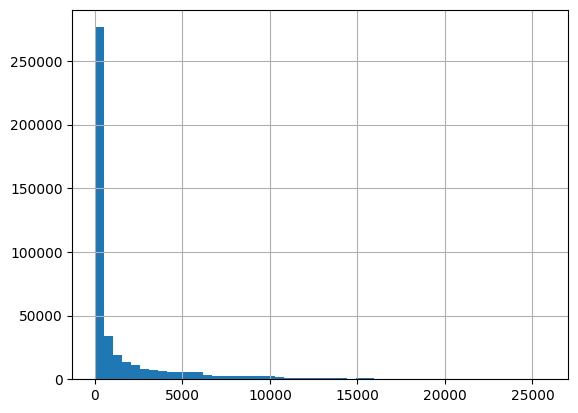

In [16]:
train_data["completion_time_hours"].hist(bins=50)

In [17]:
test_data["completion_time_hours"].describe()

count    108399.000000
mean       1634.901052
std        3163.241433
min           0.011667
25%          45.412083
50%         194.723333
75%        1491.550139
max       24520.560833
Name: completion_time_hours, dtype: float64

<Axes: >

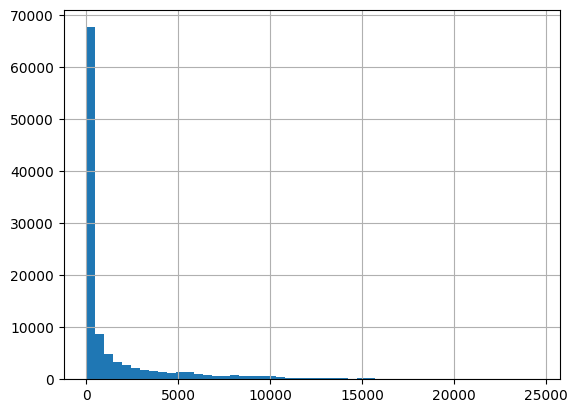

In [18]:
test_data["completion_time_hours"].hist(bins=50)

In [19]:
# time to log-transform
import numpy as np
train_data["log_completion_hours"] = np.log1p(train_data["completion_time_hours"])
test_data["log_completion_hours"] = np.log1p(test_data["completion_time_hours"])

C:\Users\brain\AppData\Local\Temp\ipykernel_15372\1703798195.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data["log_completion_hours"] = np.log1p(train_data["completion_time_hours"])
C:\Users\brain\AppData\Local\Temp\ipykernel_15372\1703798195.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data["log_completion_hours"] = np.log1p(test_data["completion_time_hours"])


<Axes: >

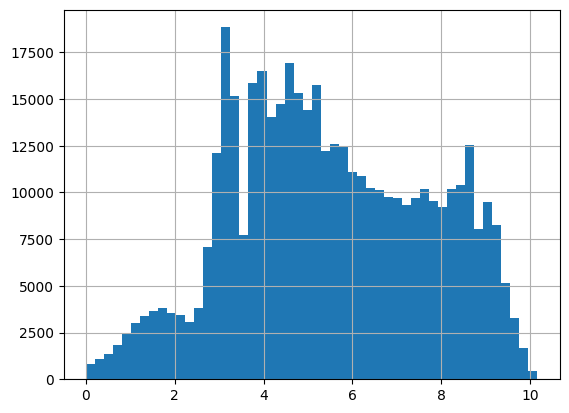

In [20]:
train_data["log_completion_hours"].hist(bins=50)

<Axes: >

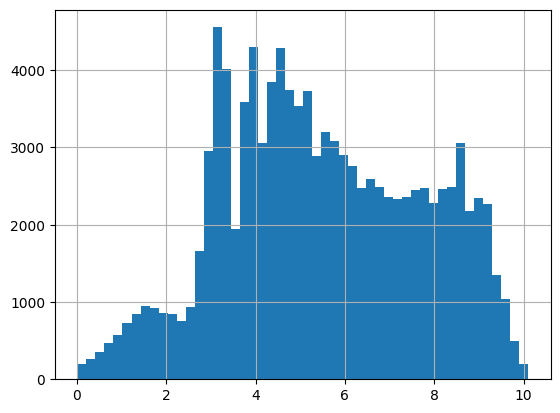

In [21]:
test_data["log_completion_hours"].hist(bins=50)

## Modeling time!

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [23]:
train_data.drop("num_relevant_orgs", axis="columns", inplace=True)
test_data.drop("num_relevant_orgs", axis="columns", inplace=True)

In [24]:
feature_cols = [col for col in train_data.columns if col not in ["completion_time_hours", "log_completion_hours"]]
X = train_data[feature_cols]
y = train_data["log_completion_hours"]
X_test = test_data[feature_cols]
y_test = test_data["log_completion_hours"]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, train_size=0.8)

<Axes: >

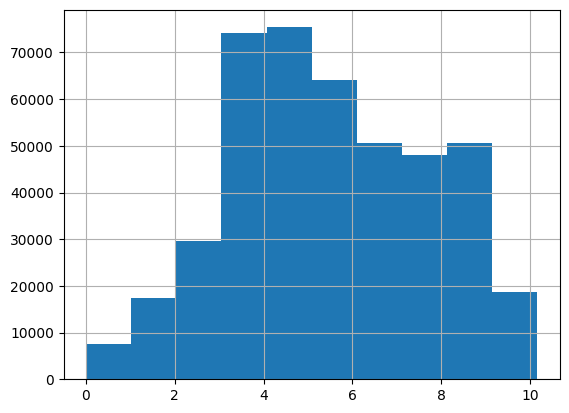

In [26]:
y.hist()

<Axes: >

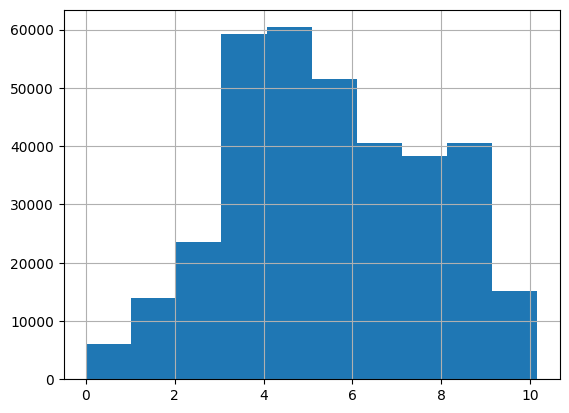

In [27]:
y_train.hist()

<Axes: >

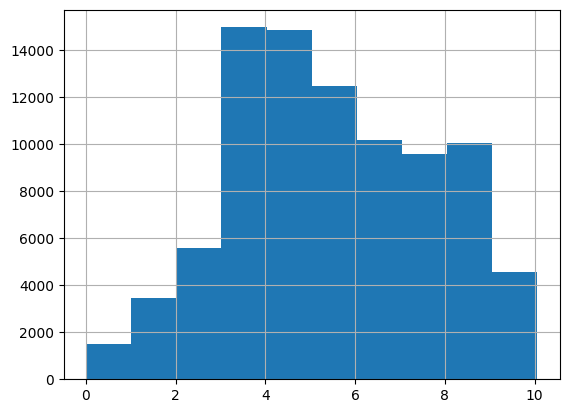

In [28]:
y_val.hist()

<Axes: >

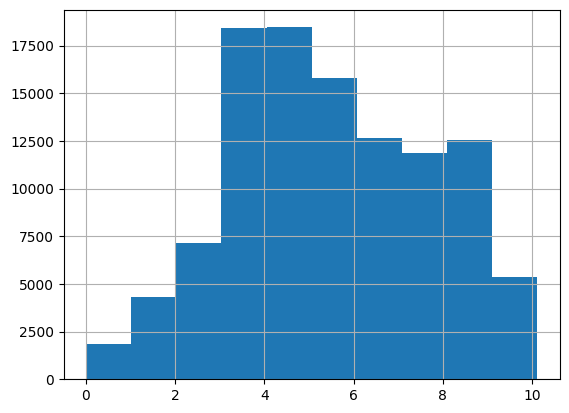

In [29]:
y_test.hist()

### RandomForest for fun

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [31]:
# first param_grid iteration
param_grid_1 = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 50],
    "max_features": ["sqrt"],
    "min_samples_leaf": [5, 25, 100]   
}

<Axes: >

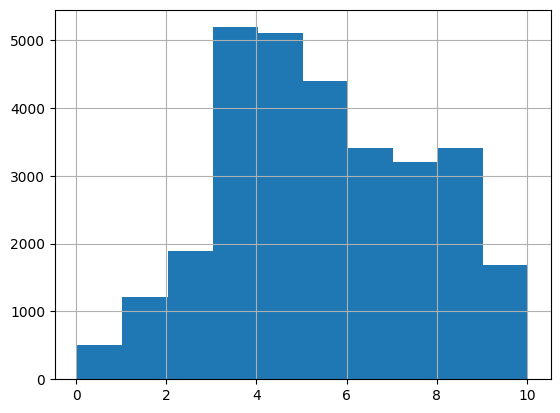

In [32]:
# Due to memory issue, we have to resort to smaller samples for gridsearch
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=30000, random_state=42)
y_sub.hist() # continuous value still gives approximately the same distribution! (okay to not stratify?)

In [33]:
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=2),
    param_grid=param_grid_1,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=4
)

In [34]:
grid.fit(X_sub, y_sub)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'max_features': ['sqrt'], 'min_samples_leaf': [5, 25, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [35]:
rf_best_params = grid.best_params_
rf_best_params

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 300}

In [36]:
# try full dataset model
rf_model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    **rf_best_params
)
rf_model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_log = rf_model.predict(X_val)

In [38]:
y_val_log = y_val

y_val_hours = np.expm1(y_val_log)
y_pred_hours = np.expm1(y_pred_log)

In [39]:
mae_log = mean_absolute_error(y_val_log, y_pred_log)
rmse_log = root_mean_squared_error(y_val_log, y_pred_log)
r2_log = r2_score(y_val_log, y_pred_log)

print("MAE (log):", mae_log)
print("RMSE (log):", rmse_log)
print("R^2 (log):", r2_log)

MAE (log): 1.4415460807196672
RMSE (log): 1.7908741798453098
R^2 (log): 0.3444092552374395


In [40]:
mae = mean_absolute_error(y_val_hours, y_pred_hours)
rmse = root_mean_squared_error(y_val_hours, y_pred_hours)
r2 = r2_score(y_val_hours, y_pred_hours)

print("MAE (hours):", mae)
print("RMSE (hours):", rmse)
print("R^2:", r2)

MAE (hours): 1323.4399236309066
RMSE (hours): 2949.4961869387653
R^2: 0.0848816586798945


In [41]:
baseline_log = np.full_like(y_val_log, y_train.mean())
baseline_hours =np.expm1(baseline_log)

mae_base  = mean_absolute_error(y_val_hours, baseline_hours)
rmse_base = root_mean_squared_error(y_val_hours, baseline_hours)
r2_base   = r2_score(y_val_hours, baseline_hours)  # will usually be <= 0

print("Baseline MAE (hours):", mae_base)
print("Baseline RMSE (hours):", rmse_base)
print("Baseline R^2:", r2_base)

Baseline MAE (hours): 1541.19120254502
Baseline RMSE (hours): 3370.3982243241076
Baseline R^2: -0.19493426921202128


In [42]:
mask = y_val_hours > 2000
mae_short  = mean_absolute_error(y_val_hours[mask], y_pred_hours[mask])
rmse_short = root_mean_squared_error(y_val_hours[mask], y_pred_hours[mask])
r2_short   = r2_score(y_val_hours[mask], y_pred_hours[mask])

print(">2000 MAE (hours):", mae_short)
print(">2000 RMSE (hours):", rmse_short)
print(">2000 R^2:", r2_short)

>2000 MAE (hours): 5066.630625665788
>2000 RMSE (hours): 6262.4644695722745
>2000 R^2: -1.5979586773187777


### XGBoost...?

In [43]:
import xgboost as xgb

In [44]:
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",  # standard regression
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    device="cuda"
)
xgb_model.fit(X_train, y_train)
y_pred_log = xgb_model.predict(X_val)

c:\Users\brain\.conda\envs\dsde\Lib\site-packages\xgboost\core.py:774: UserWarning: [08:12:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [45]:
param_grid_2 = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "n_estimators": [200, 400, 600],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.7, 0.9],
    "min_child_weight": [1, 5, 10],
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, n_jobs=2),
    param_distributions=param_grid_2,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=4,
    random_state=42
)

In [49]:
search.fit(X_sub, y_sub)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.